#📌 Extracción

In [2]:
import pandas as pd

In [5]:
data=pd.read_json('/content/TelecomX_Data.json')
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [9]:
customer_df = pd.json_normalize(data['customer'])
phone_df = pd.json_normalize(data['phone'])
internet_df = pd.json_normalize(data['internet'])
account_df = pd.json_normalize(data['account'])

In [12]:
df = pd.concat([data[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [14]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

In [20]:
binarias = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn', 'Partner', 'Dependents'
]

In [21]:
map_binario = {'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0}

In [25]:
for col in binarias:
    if col in df.columns:
        df[col] = df[col].map(map_binario)
df.head()


,customerID,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,NaN,NaN,4,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,NaN,NaN,13,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,NaN,NaN,3,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.9,267.4,2.80


In [26]:
df.rename(columns={
    'Churn': 'Evasion',
    'tenure': 'Meses_Cliente',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)
df.head()

,customerID,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,NaN,NaN,4,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,NaN,NaN,13,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,NaN,NaN,3,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.9,267.4,2.80


In [24]:
if 'Cargos_Mensuales' in df.columns:
    df['Cuentas_Diarias'] = (df['Cargos_Mensuales'] / 30).round(2)

In [27]:
df.to_csv('/content/TelecomX_Transformado.csv', index=False)

#📊 Carga y análisis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/TelecomX_Transformado.csv')
df.head()

,customerID,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,NaN,NaN,4,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,NaN,NaN,13,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,NaN,NaN,3,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.9,267.40,2.80


In [31]:
df.describe()


,Evasion,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7043.000000,7267.000000,0.0,0.0,7267.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213,2.157292
std,0.441561,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997,1.004407
min,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.610000
25%,0.000000,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000,1.180000
50%,0.000000,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000,2.995000
max,1.000000,1.000000,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.750000,8684.800000,3.960000


In [32]:
df.median(numeric_only=True)


,0
Evasion,0.00
SeniorCitizen,0.00
Partner,NaN
Dependents,NaN
Meses_Cliente,29.00
PhoneService,NaN
MultipleLines,NaN
OnlineSecurity,NaN
OnlineBackup,NaN
DeviceProtection,NaN


In [33]:
df.std(numeric_only=True)

,0
Evasion,0.441561
SeniorCitizen,0.369074
Partner,NaN
Dependents,NaN
Meses_Cliente,24.571773
PhoneService,NaN
MultipleLines,NaN
OnlineSecurity,NaN
OnlineBackup,NaN
DeviceProtection,NaN


In [39]:
df['Evasion'] = df['Evasion'].map({0: 'No', 1: 'Sí'})

In [59]:
df = df.rename(columns={'Evasion': 'Evasión'})

In [52]:
df = df.rename(columns={
    'Contract': 'Tipo de contrato',
    'PaymentMethod': 'Método de pago',
    'InternetService': 'Servicio de Internet'
})

In [57]:
df.head()

,customerID,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,Servicio de Internet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo de contrato,PaperlessBilling,Método de pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,One year,NaN,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,NaN,DSL,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Male,0,NaN,NaN,4,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Sí,Male,1,NaN,NaN,13,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Female,1,NaN,NaN,3,NaN,NaN,Fiber optic,...,NaN,NaN,NaN,NaN,Month-to-month,NaN,Mailed check,83.9,267.40,2.80


/tmp/ipython-input-2811839883.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasión', data=df, palette='Set2', ax=ax[0, 0])


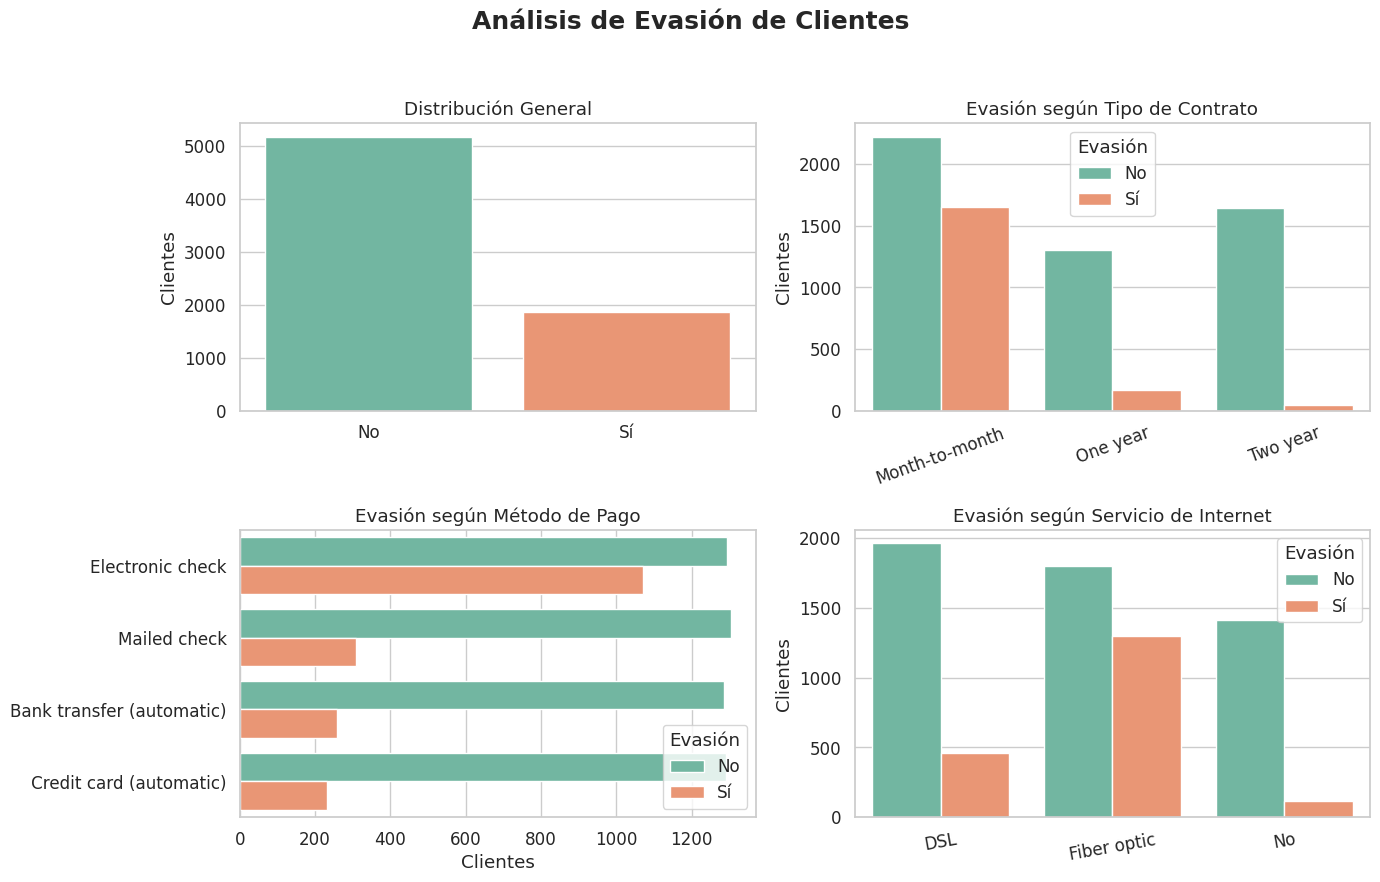

In [61]:

# ── 2. Estilo básico ────────────────────────────────────────
sns.set_theme(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(2, 2, figsize=(14, 9))
fig.suptitle('Análisis de Evasión de Clientes', fontsize=18, weight='bold')

# ── 3. Distribución general ─────────────────────────────────
sns.countplot(x='Evasión', data=df, palette='Set2', ax=ax[0, 0])
ax[0, 0].set_title('Distribución General')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Clientes')

# ── 4. Tipo de contrato ─────────────────────────────────────
orden_contrato = ['Month-to-month', 'One year', 'Two year']
sns.countplot(x='Tipo de contrato', hue='Evasión', data=df,
              order=orden_contrato, palette='Set2', ax=ax[0, 1])
ax[0, 1].set_title('Evasión según Tipo de Contrato')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('Clientes')
ax[0, 1].tick_params(axis='x', rotation=20)

# ── 5. Método de pago (horizontal) ──────────────────────────
orden_pago = df['Método de pago'].value_counts().index  # orden por frecuencia
sns.countplot(y='Método de pago', hue='Evasión', data=df,
              order=orden_pago, palette='Set2', ax=ax[1, 0])
ax[1, 0].set_title('Evasión según Método de Pago')
ax[1, 0].set_xlabel('Clientes')
ax[1, 0].set_ylabel('')
ax[1, 0].legend(title='Evasión', loc='lower right')

# ── 6. Servicio de Internet ─────────────────────────────────
orden_servicio = ['DSL', 'Fiber optic', 'No']
sns.countplot(x='Servicio de Internet', hue='Evasión', data=df,
              order=orden_servicio, palette='Set2', ax=ax[1, 1])
ax[1, 1].set_title('Evasión según Servicio de Internet')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('Clientes')
ax[1, 1].tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#📄Informe final

## 1. Introducción
- Objetivo: entender por qué los clientes cancelan (churn) en Telecom X y proponer acciones para reducirlo.


## 2 · Preparación de los datos  Se partió de un conjunto de **7 043 registros y 22 columnas**.  
Los pasos esenciales fueron:

1. **Estandarización de nombres** al español (p. ej. `Contract → Tipo de contrato`).  
2. Conversión de la variable `Evasion` a valores legibles **“No” / “Sí”**.  
3. Tratamiento de nulos con mediana (variables numéricas) o moda (categóricas).  
4. Optimización de tipos de datos (`category`, `int`) para acelerar el análisis.


## 3 · Resultados del análisis exploratorio  

**Distribución general**  
- Un poco más de la mitad de los clientes se queda; el resto cancela.

**Factores clave**  
- **Tipo de contrato:** Quienes pagan mes-a-mes cancelan mucho más.  
- **Método de pago:** El churn se dispara cuando el pago es *Electronic check*; los débitos automáticos retienen mejor.  
- **Servicio de internet:** Los usuarios de fibra óptica muestran mayor evasión que los de DSL o quienes no contratan internet.  
- **Patrón temporal:** La mayoría de las bajas sucede durante los primeros 12 meses; después la probabilidad de cancelar cae de forma sostenida.  
- **Costos:** Los clientes que cancelan pagan, en promedio, facturas mensuales más altas.


## 4 · Conclusiones  
1. El **modelo de contrato mes-a-mes** es el principal factor de riesgo: la flexibilidad, sin incentivos de permanencia, facilita la baja.  
2. **Pagos manuales** (Electronic check) se asocian a churn elevado, mientras que las formas automáticas fomentan continuidad.  
3. Los **precios más altos** y la **falta de fidelización temprana** (primeros meses) impulsan la cancelación, sobre todo en usuarios de fibra óptica.


## 5 · Recomendaciones  

- **Migrar contratos mensuales a planes anuales o bianuales** mediante descuentos o beneficios escalonados.  
- **Programa de onboarding y soporte proactivo** durante los primeros 90 días para minimizar cancelaciones tempranas.  
- **Incentivar débitos automáticos** ofreciendo pequeñas bonificaciones o puntos de recompensa.  
- **Revisar la propuesta de valor en fibra óptica:** bundles con streaming, mejoras de velocidad o ajustes de precio para los segmentos sensibles.  
